In [ ]:
%pip install pyswarm
%pip install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=149022ab482b18b283ad831790113800e52d76690a7611f9558cdf98936c851a
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


Stopping search: maximum iterations reached --> 50


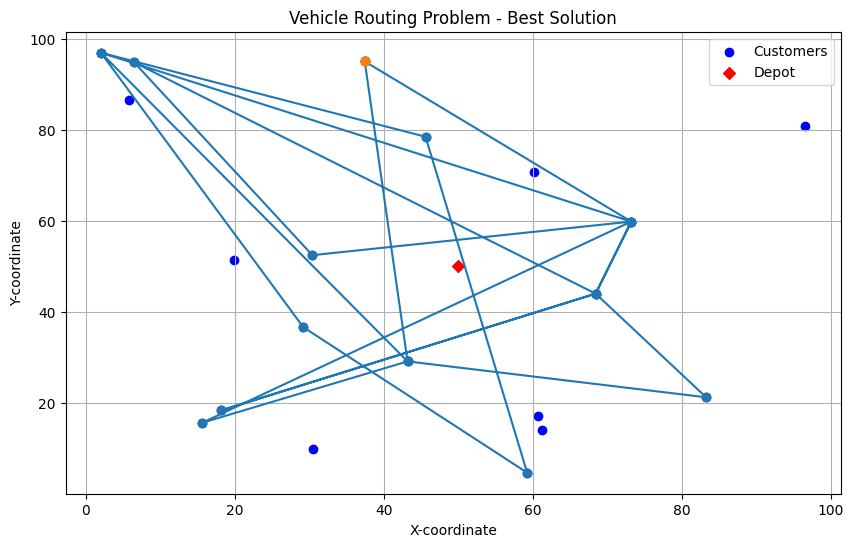

Best Fitness (Total Distance + Penalty): 698.7145321160025


In [ ]:
import numpy as np
from scipy.spatial import distance
from pyswarm import pso
import matplotlib.pyplot as plt

# Define the VRP problem parameters
num_customers = 20  # Number of customers
num_vehicles = 6    # Number of vehicles
capacity = 5        # Capacity of each vehicle

# Generate random customer locations and demands
np.random.seed(42)
customer_locations = np.random.rand(num_customers, 2) * 100
customer_demands = np.random.randint(1, 5, size=num_customers)

# Define the distance matrix between customers and depot
depot_location = np.array([50, 50])
distances_to_depot = distance.cdist([depot_location], customer_locations, 'euclidean')[0]

# Define the PSO optimization objective function
def vrp_objective(solution, *params):
    """
    Objective function for PSO to solve the Vehicle Routing Problem.

    Parameters:
    - solution: 1D array representing the sequence of customers for each vehicle
    - params: Tuple of additional parameters (demands, capacity, distances_to_depot)
    """
    demands, capacity, distances_to_depot = params

    # Split the solution into routes for each vehicle
    routes = np.split(solution.astype(int), np.where(solution == 0)[0])

    # Calculate the fitness based on the total distance traveled and demand constraints
    total_distance = 0
    fitness_penalty = 0

    for route in routes:
        if len(route) > 0:
            route_distance = np.sum(distances_to_depot[route[:-1]]) + distances_to_depot[route[-1]]
            total_distance += route_distance

            route_demand = np.sum(demands[route])
            fitness_penalty += max(0, route_demand - capacity)

    fitness = total_distance + fitness_penalty

    return fitness

# PSO optimization
lb = np.ones(num_customers - 1)  # Lower bounds for the solution (excluding depot)
ub = np.ones(num_customers - 1) * (num_customers - 1)  # Upper bounds for the solution
swarmsize = 10
maxiter = 50

# Additional parameters for the objective function
params = (customer_demands, capacity, distances_to_depot)

# Run PSO
best_routes, _ = pso(vrp_objective, lb, ub, args=params, swarmsize=swarmsize, maxiter=maxiter)

# Extract the best solution
best_routes = np.round(best_routes).astype(int)
best_solution = np.concatenate(([0], best_routes, [0]))
best_fitness = vrp_objective(best_routes, *params)

# Visualize the best solution
plt.figure(figsize=(10, 6))

# Scatter plot of customer locations
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], color='blue', label='Customers')
plt.scatter(depot_location[0], depot_location[1], color='red', marker='D', label='Depot')

# Plot the best routes
routes = np.split(best_solution, np.where(best_solution == 0)[0])
for route in routes:
    if len(route) > 0:
        route_points = np.concatenate(([0], route, [0]))
        plt.plot(customer_locations[route_points, 0], customer_locations[route_points, 1], linestyle='-', marker='o')

# Set plot labels and title
plt.title('Vehicle Routing Problem - Best Solution')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()

# Display the accuracy check regression graph
print("Best Fitness (Total Distance + Penalty):", best_fitness)
